# Classification of two varieties of Raisins

Source: https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset

by Madhura Ashtekar

In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, plot_precision_recall_curve
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#reading the file from the device
df = pd.read_csv('Raisin_Dataset.csv')
#printing the first 5 rows
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


We are classifying two varieties, that is, classes of raisins - Kecimen and Besni.


## Checking the rows and columns in the dataframe

In [ ]:
df.shape

(900, 8)

There are 900 rows (grains of raisins) and 8 features out of which 1 is the class label.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


## Plotting a histogram to see the distribution of the classes

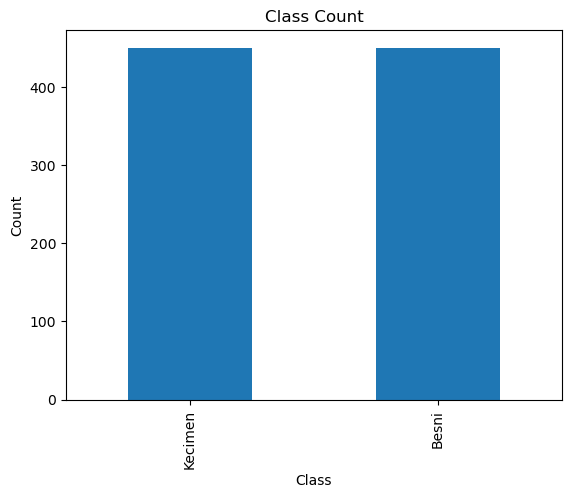

In [ ]:
class_counts = df['Class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The two classes are almost equally distributed from the above graph.

## Analyzing the relationship of the features

In [ ]:
corr = df.corr()
corr

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


## Checking distribution of each variable

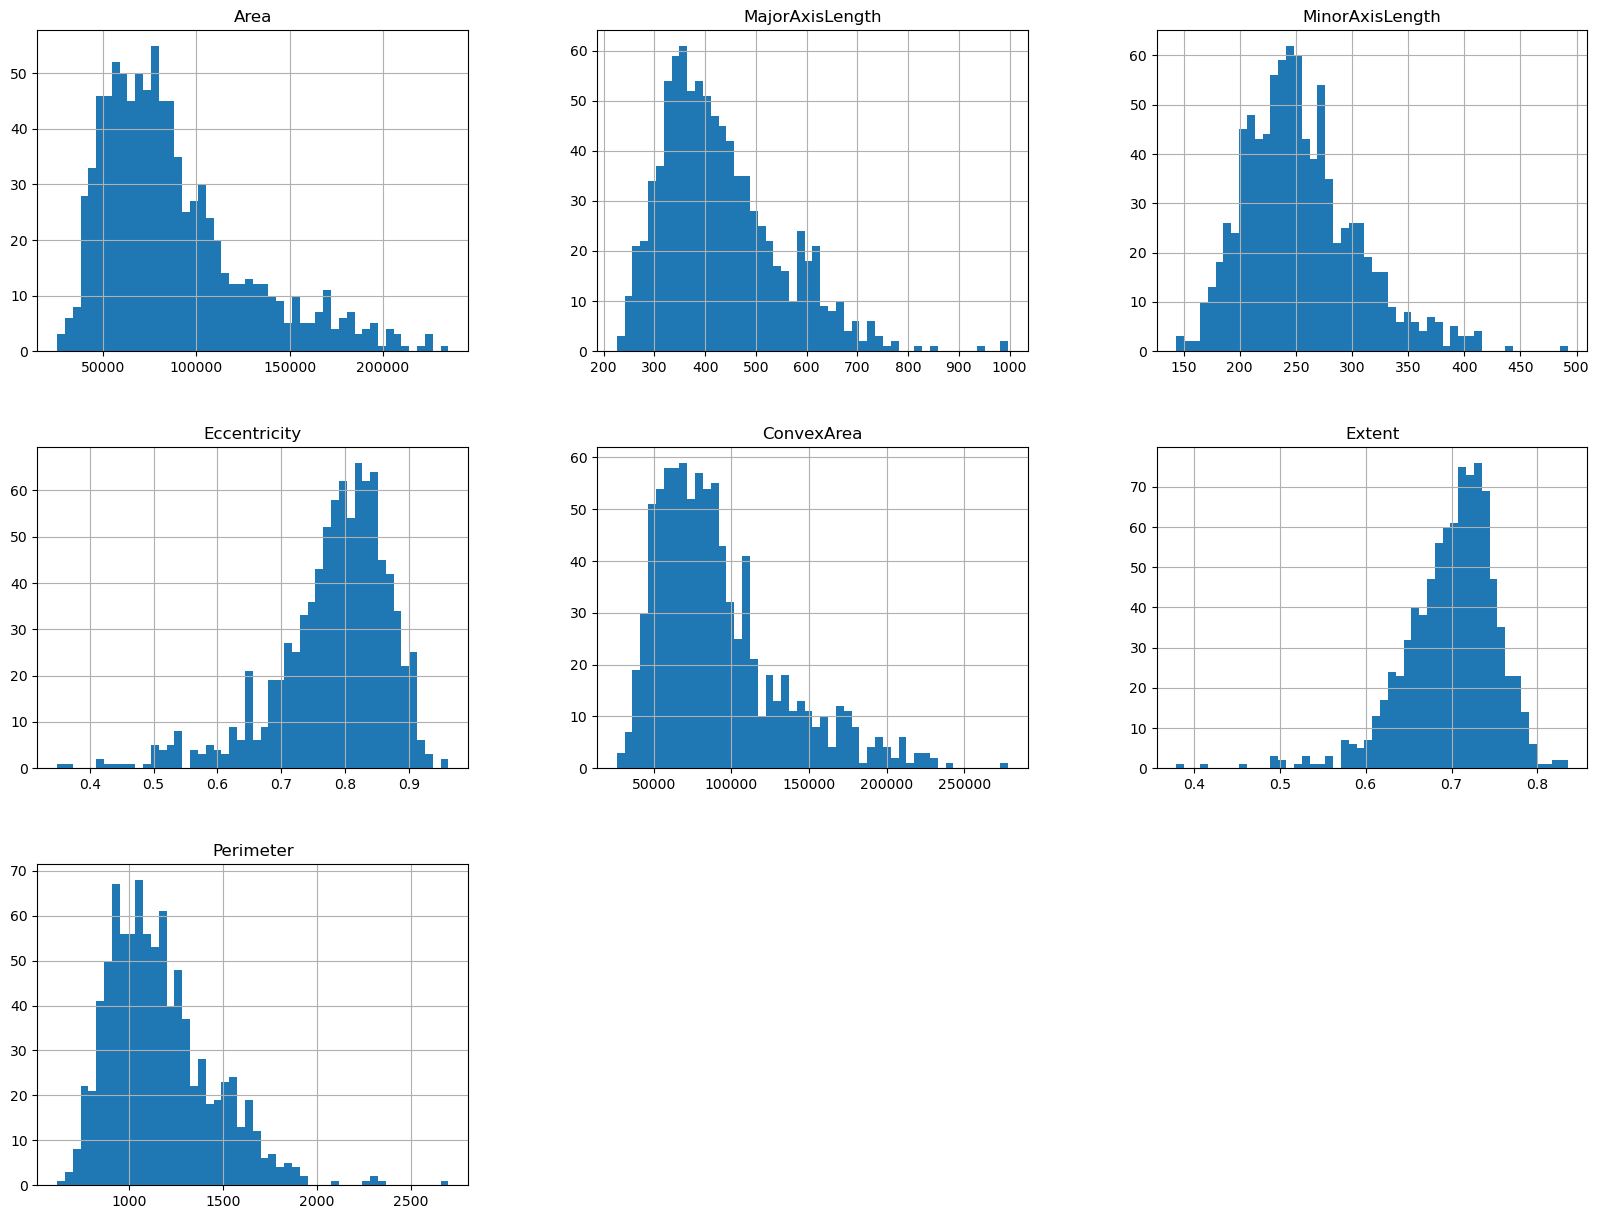

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

The above histograms show a distribution of each feature in the dataset.
The distribution for Area, MajorAxisLength, MinorAxisLength, ConvexArea, Perimeter are positively skewed in distribution. Whereas, Eccentricity and Extent have a negatuvely skewed distribtion.

## Plotting pairplot to see scatter plots of the features

<Figure size 1500x2000 with 0 Axes>

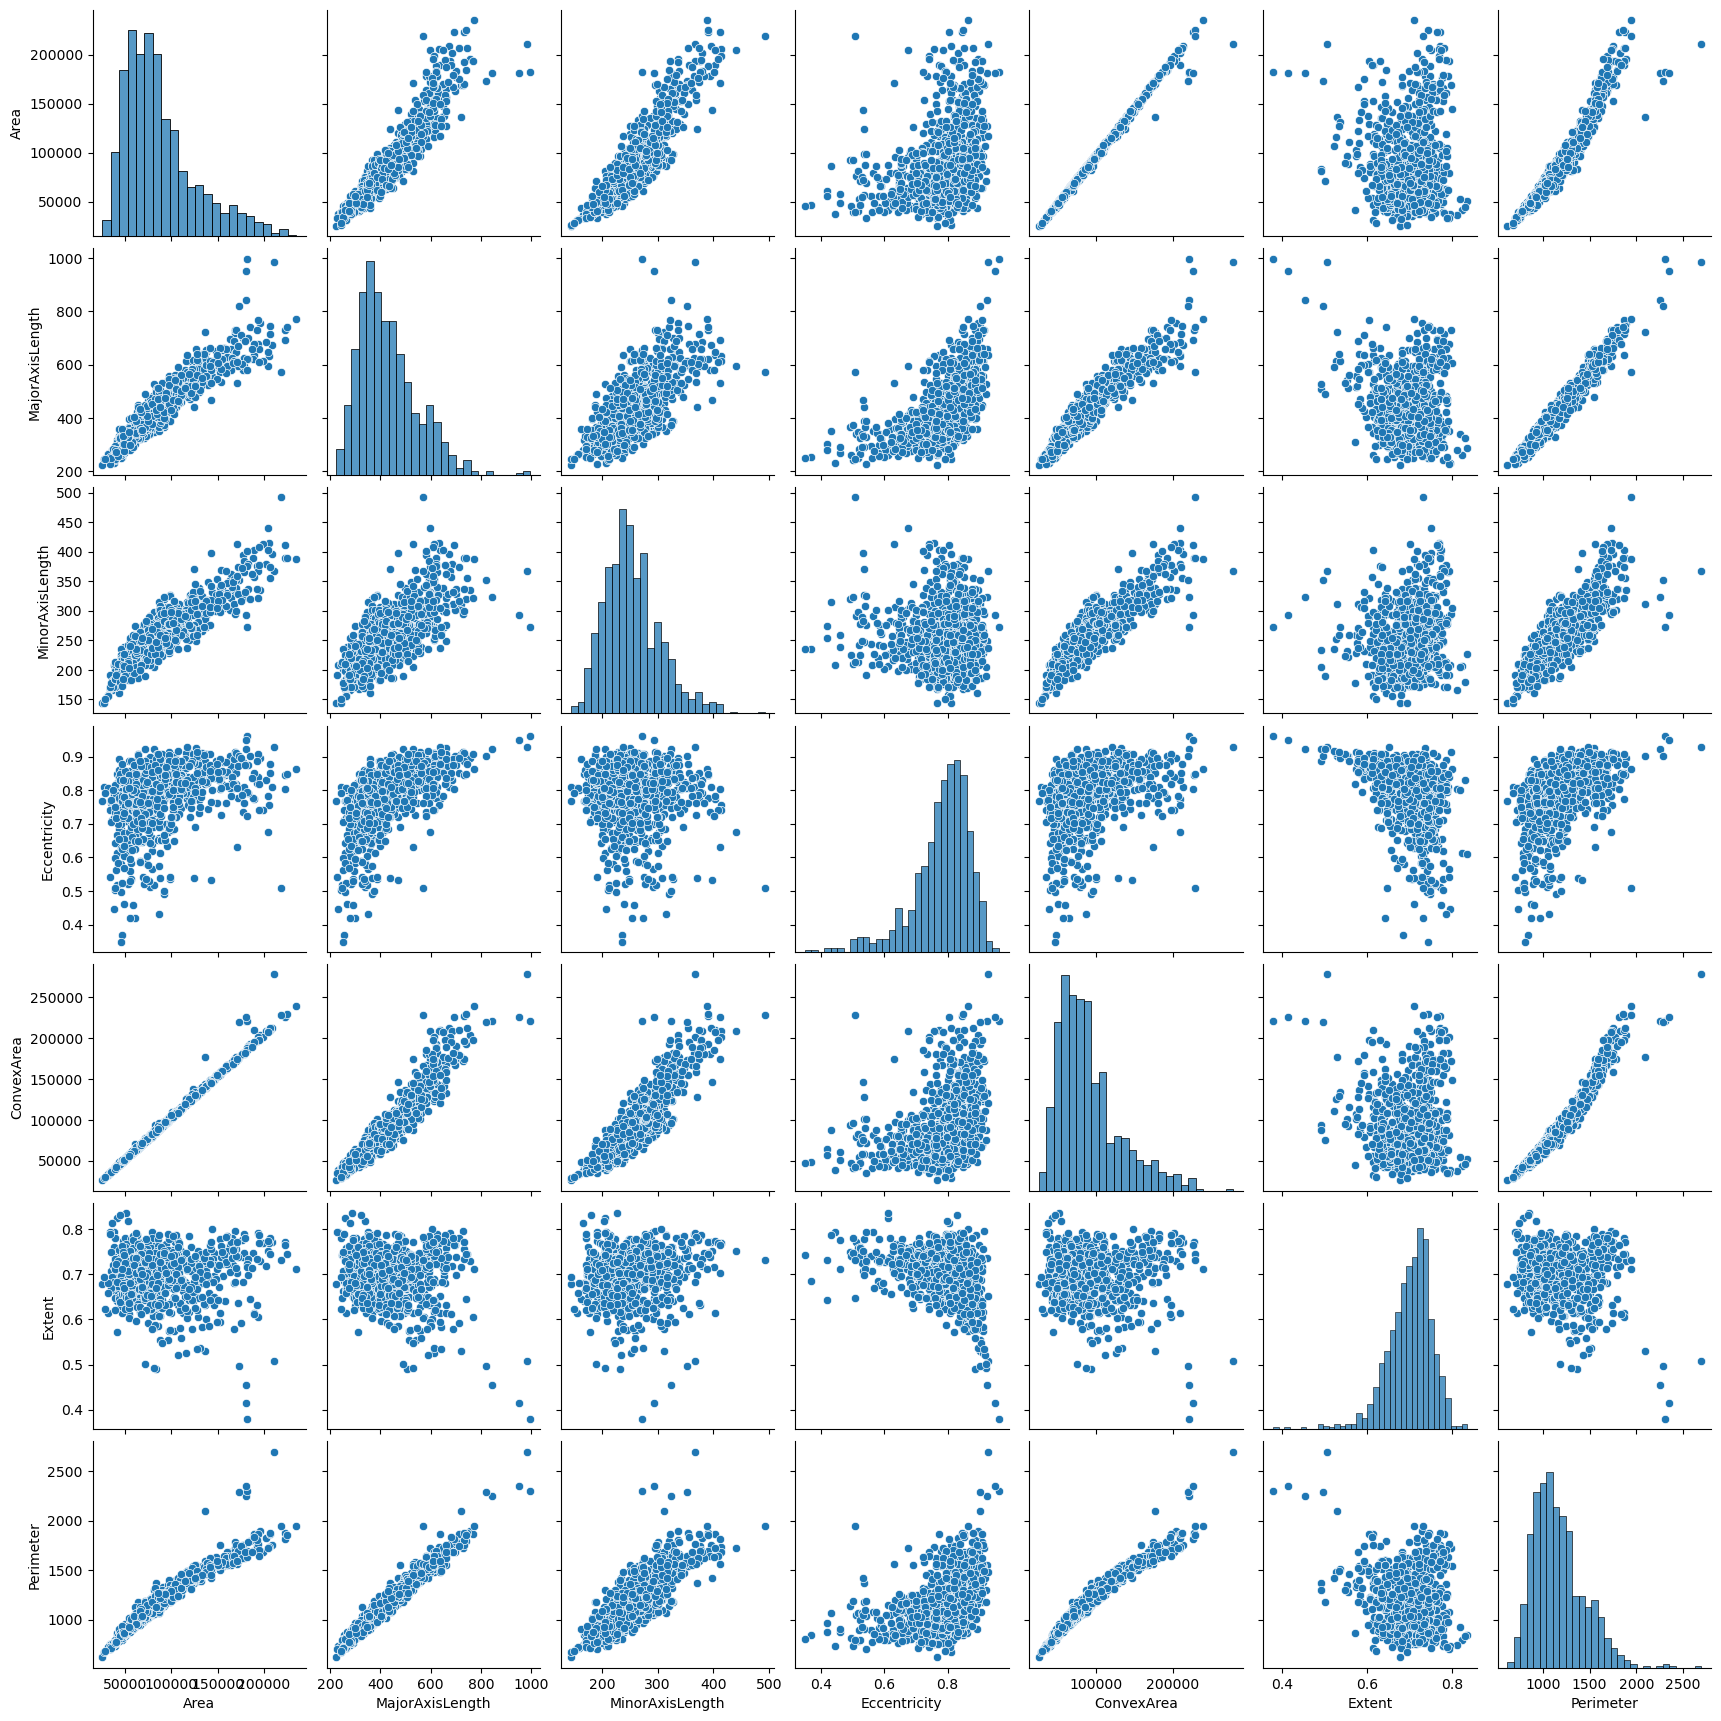

In [ ]:
plt.figure(figsize=(15,20))
sns.pairplot(data=df)
plt.show()

## Plotting a heatmap to see the correlations

In [ ]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.00,0.93,0.91,0.34,1.00,-0.01,0.96
MajorAxisLength,0.93,1.00,0.73,0.58,0.95,-0.20,0.98
MinorAxisLength,0.91,0.73,1.00,-0.03,0.90,0.15,0.83
Eccentricity,0.34,0.58,-0.03,1.00,0.35,-0.36,0.45
ConvexArea,1.00,0.95,0.90,0.35,1.00,-0.05,0.98
Extent,-0.01,-0.20,0.15,-0.36,-0.05,1.00,-0.17
Perimeter,0.96,0.98,0.83,0.45,0.98,-0.17,1.00


The above correlation matrix shows that Area has positive correlation with MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea and Perimeter. However, it has negative correaltion with Extent of the raisins.

## Checking for null values

In [ ]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

No null values were found

## Replacing categorical values of Class with 0 and 1

In [ ]:
df['Class'] = df['Class'].str.replace('Kecimen', '1')
df['Class'] = df['Class'].str.replace('Besni', '0')
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [ ]:
X = df.drop(['Class'],axis = 1)
y = df['Class']

## Splitting training and testing data

In [ ]:
# Split the data into training and testing with test size as 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Size of X_train: ", X_train.shape)
print("Size of X_test: ", X_test.shape)
print("Size of y_train: ", y_train.shape)
print("Size of y_test: ", y_test.shape)

Size of X_train:  (720, 7)
Size of X_test:  (180, 7)
Size of y_train:  (720,)
Size of y_test:  (180,)


## Converting X and y to numpy arrays to perform further operations

In [ ]:
X_trainn = np.array(X_train, dtype="float32")
y_trainn = np.array(y_train, dtype="float32")
X_testt = np.array(X_test, dtype="float32")
y_testt = np.array(y_test, dtype="float32")

## Scaling the values of X

In [ ]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_trainn)
X_test_scaled = scaler.fit_transform(X_testt)

In [ ]:
X_train_scaled[0]

array([-0.1975479 ,  0.14897284, -0.44638428,  0.81034476, -0.1745895 ,
       -0.45516506,  0.02725015], dtype=float32)

## Function to plot confusion matrix

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest


## Function for evaluating models

In [ ]:
def evaluate_model(X_train, y_train, model):
    X_neww = X_train
    y_neww = y_train

    # Create a StratifiedKFold object
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

    # Initialize lists to store training and validation accuracies
    train_acc = []
    val_acc = []

    confusion_matrices = []
    classification_reports = []

    # Initialize variables to store best validation accuracy and associated confusion matrix
    best_val_acc = 0
    best_cm = None

    # Loop over the folds
    fold_count = 1
    for train, validation in kfold.split(X_neww, y_neww):
        print(f"Fold {fold_count}")
        fold_count = fold_count + 1

        # Split the data into training and validation sets
        X_train, y_train = X_neww[train], y_neww[train]
        X_val, y_val = X_neww[validation], y_neww[validation]

        # Train the model on the training set
        history = model.fit(X_train, y_train)

        # Evaluate the model on the training set
        train_scores = model.score(X_train, y_train)
        train_acc.append(train_scores)

        # Evaluate the model on the validation set
        val_scores = model.score(X_val, y_val)
        val_acc.append(val_scores)


        # Calculate the confusion matrix and classification report for the validation set
        y_pred = model.predict(X_val)
        cm = confusion_matrix(y_val, y_pred)
        cr = classification_report(y_val, y_pred)

        # Append the confusion matrix and classification report to lists
        confusion_matrices.append(cm)
        classification_reports.append(cr)

        # Check if the current fold has the highest validation accuracy so far
        if val_scores > best_val_acc:
            best_val_acc = val_scores
            best_cm = cm

    # Plot the training and validation accuracies
    print("train_acc:", train_acc)
    print("val_acc:", val_acc)
    mean_train_acc = mean(train_acc)
    mean_val_acc = mean(val_acc)
    train_acc_percent = round(mean_train_acc * 100, 2)
    val_acc_percent = round(mean_val_acc * 100, 2)
    print("Mean train_acc: {:.2f}%".format(train_acc_percent))
    print("Mean val_acc: {:.2f}%".format(val_acc_percent))
    plt.plot(train_acc, label='Training accuracy')
    plt.plot(val_acc, label='Validation accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot the confusion matrix for the fold with the highest validation accuracy
    if best_cm is not None:
        plt.figure(figsize=(6, 4))
        sns.heatmap(best_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
        plt.title("Confusion Matrix (Best Validation Accuracy)")
        plt.xlabel("Predicted label")
        plt.ylabel("True label")
        plt.show()

    # Print the classification report for the last fold
    print("Classification report:")
    print(classification_reports[-1])



# Multinomial Logistic Regression

Fold 1
Fold 2
Fold 3
Fold 4
train_acc: [0.8703703703703703, 0.8629629629629629, 0.8814814814814815, 0.8666666666666667]
val_acc: [0.8666666666666667, 0.8944444444444445, 0.8222222222222222, 0.8722222222222222]
Mean train_acc: 87.04%
Mean val_acc: 86.39%


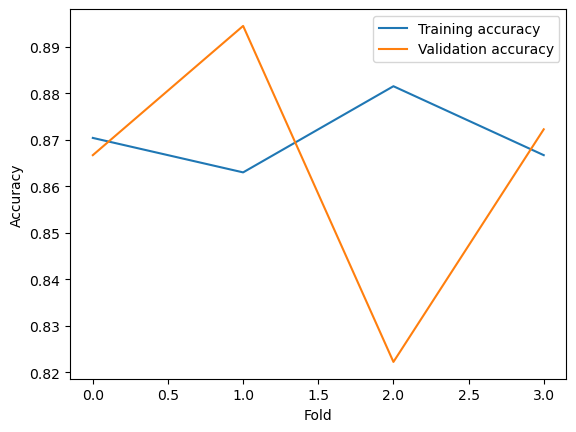

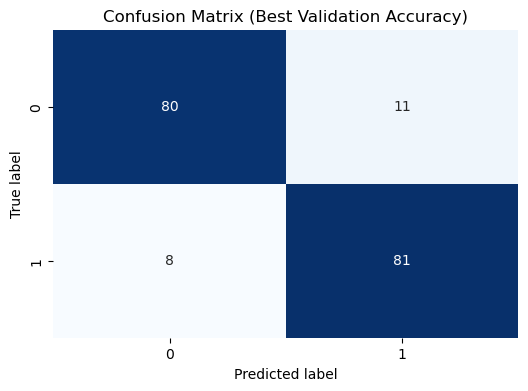

Classification report:
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87        91
         1.0       0.87      0.88      0.87        89

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [ ]:
evaluate_model(X_train_scaled, y_trainn, model = LogisticRegression(multi_class='multinomial', solver='lbfgs'))

The above graph shows increasing training and validation accuracies with increasing value of k folds. The mean accuracy is about 86%. Thus, we can say that the Multinomial Logistic Regression has fit well on the data.

The mean accuracy for training and validation has come out to be very close at 86%. From the graph we can say that since both the accuracies are increasing, the model is well fit.

## Grid search for logostic regression

In [ ]:
logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# define the hyperparameter search space
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

# define the grid search
grid_search = GridSearchCV(
    logistic_regression, param_grid=param_grid,
    cv=None, n_jobs=-1, verbose=1
)

# fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# print the best hyperparameters and validation accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best validation accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Best validation accuracy:  0.8625


We know that the best parameters using grid search have come out to be c=1, maximum iterations=100, and penalty=12. We will now use it to find the confusion matrix and the classification report.

## Function to run the best model with parameters found from grid search

In [ ]:
def run_the_best_model(X_train, y_train, model):

    X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

    model.fit(X_trainn, y_trainn)

    y_pred = model.predict(X_val)

    cm = confusion_matrix(y_val, y_pred)

    sns.heatmap(cm, annot=True)

    report = classification_report(y_val, y_pred)

    print(report)

    val_scores = model.score(X_val, y_val)

    print(val_scores)

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89       116
         1.0       0.83      0.96      0.89       100

    accuracy                           0.89       216
   macro avg       0.89      0.89      0.89       216
weighted avg       0.90      0.89      0.89       216

0.8888888888888888


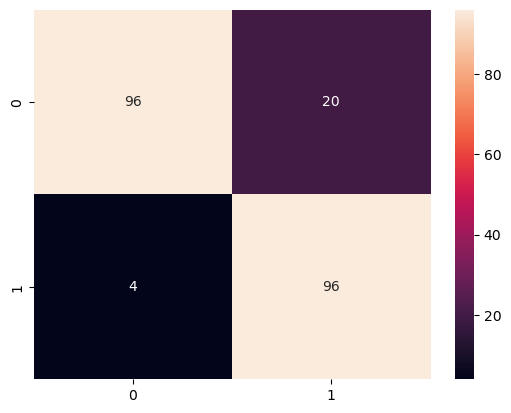

In [ ]:
LR = run_the_best_model(X_train_scaled, y_trainn, model = LogisticRegression(C =1, max_iter =100, multi_class = 'multinomial', penalty = 'l2', solver= 'lbfgs'))

Previously, the mean training and validation accuracy for Logistic regression was about 86%. With the best parameters it has come out to be 88% which is higher.
The True Positives are also more in the second confusion matrix (96) than before (86). Thus, this confusion matrix with the best parameters overall has classified better than the previous one.

## Testing

In [ ]:
def run_the_best_model(X_train, y_train,X_test, y_test ,model):


    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    report = classification_report(y_test, y_pred)
    print(report)

    val_scores = model.score(X_test, y_test)
    print(val_scores)

    return val_scores

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        86
         1.0       0.90      0.84      0.87        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180

0.8666666666666667


0.8666666666666667

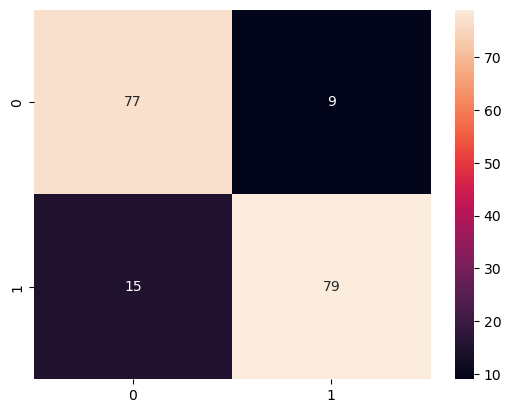

In [ ]:
run_the_best_model(X_train_scaled, y_trainn, X_test_scaled, y_testt, model=LogisticRegression(C=1, max_iter=100, multi_class='multinomial', penalty='l2', solver='lbfgs'))


## Function to plot ROC and AUC curve

In [ ]:
def roc_curve(X_train_scaled, y_train, model):

    # Split the data into training and testing sets

    X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=42)
    model.fit(X_trainb, y_trainb)

    # Make predictions on the testing data

    y_pred_prob = model.predict_proba(X_testb)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_testb, y_pred_prob)

    # Calculate the AUC score

    auc_score = roc_auc_score(y_testb, y_pred_prob)

    # Plot the ROC curve

    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title('ROC Curve')

    plt.legend()

    plt.show()

Plotting roc curve for logistic regression with best parameters

In [ ]:
roc_curve(X_train_scaled, y_trainn, model = LogisticRegression(C =1, max_iter =100, multi_class = 'multinomial', penalty = 'l2', solver= 'lbfgs', probability = True))

TypeError: __init__() got an unexpected keyword argument 'probability'

# SVM

## Linear kernel

Fold 1
Fold 2
Fold 3
Fold 4
train_acc: [0.8740740740740741, 0.8666666666666667, 0.8888888888888888, 0.8648148148148148]
val_acc: [0.8888888888888888, 0.8944444444444445, 0.8111111111111111, 0.8833333333333333]
Mean train_acc: 87.36%
Mean val_acc: 86.94%


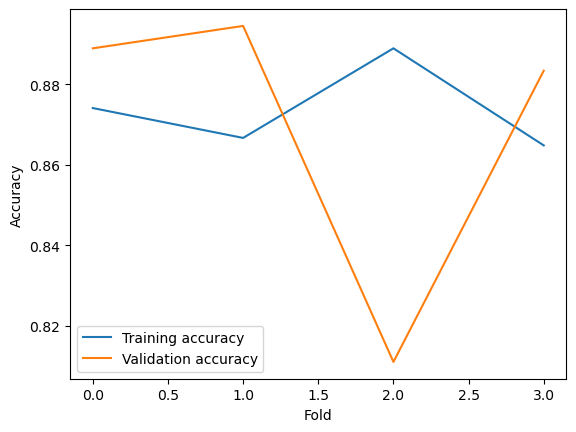

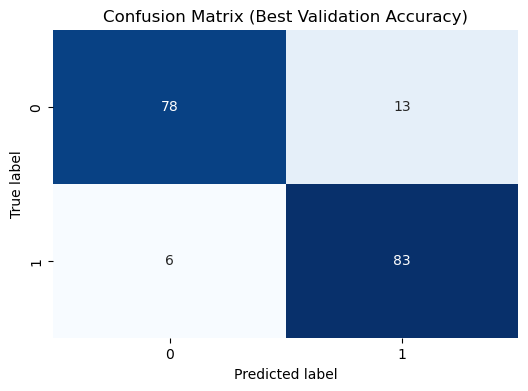

Classification report:
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88        91
         1.0       0.86      0.91      0.89        89

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



In [ ]:
#svm with linear kernel
evaluate_model(X_train_scaled, y_trainn, model = SVC(kernel='linear', C=1))

The above graph shows that training accuracy and validation accuracy are very close. The best accuracy for training and validation is about 87% after performing 5 fold cross validation.
This tells us that the linear kernel in SVM is well fit.

## SVM with RBF kernel

Fold 1
Fold 2
Fold 3
Fold 4
train_acc: [0.8796296296296297, 0.8703703703703703, 0.8981481481481481, 0.8740740740740741]
val_acc: [0.8611111111111112, 0.8944444444444445, 0.8166666666666667, 0.8944444444444445]
Mean train_acc: 88.06%
Mean val_acc: 86.67%


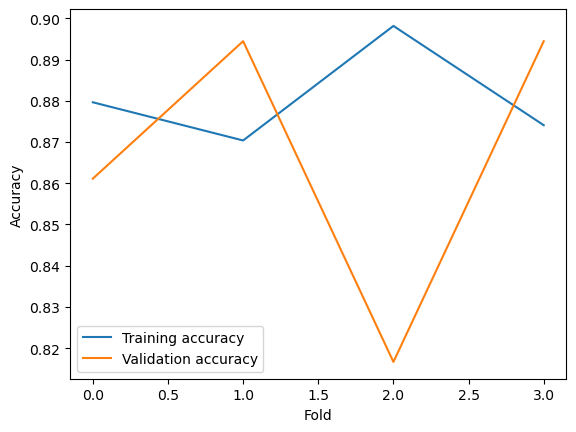

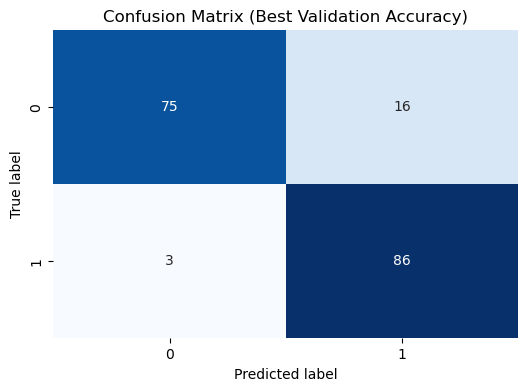

Classification report:
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89        91
         1.0       0.86      0.93      0.90        89

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180



In [ ]:
# svm with rbf kernel
evaluate_model(X_train_scaled, y_trainn, model = SVC(gamma = 'scale', kernel='rbf', C=5))

The true positives are 75 here and false positives are 16. Let's check these further after grid search.

The above graph shows that training accuracy and validation accuracy are very close.
The average accuracy for training and validation is about 87%. This tells us that the rbf kernel is well fit.

## Grid search for SVM to check the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC()

# define the hyperparameter search space
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'degree': [2, 3],
    'gamma' :['scale', 'auto', 0.1, 1, 10]
}


# define the grid search
grid_search = GridSearchCV(
    svc, param_grid=param_grid,
    cv=None, n_jobs=-1, verbose=1
)

# fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# print the best hyperparameters and validation accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best validation accuracy: ", grid_search.best_score_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparameters:  {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Best validation accuracy:  0.8777777777777779


We know that the best parameters using grid search have come out to be rbf kernel, c=10, degree=2 and gamma=1. We will now use it to find the confusion matrix and the classification report.

              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88       116
         1.0       0.82      0.96      0.88       100

    accuracy                           0.88       216
   macro avg       0.89      0.89      0.88       216
weighted avg       0.90      0.88      0.88       216

0.8842592592592593


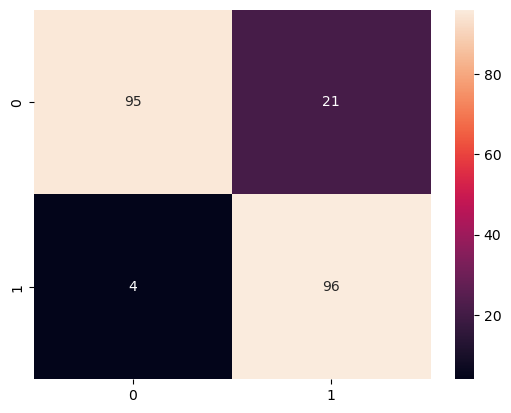

In [ ]:
run_the_best_model(X_train_scaled, y_trainn, model=SVC(kernel='rbf', C=10, degree=2, gamma=1))

## Testing on Svm rbf kernel

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86        86
         1.0       0.91      0.82      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.87      0.86      0.86       180

0.8611111111111112


0.8611111111111112

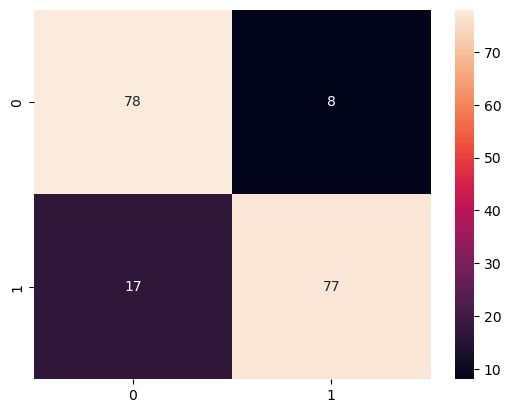

In [ ]:
run_the_best_model(X_train_scaled, y_trainn, X_test_scaled, y_testt, model=SVC(kernel='rbf', C=10, degree=2, gamma=1))


We can see that true positives have increased and are 95 now and false positives are 21.

## SVM Polynomial kernel

Fold 1
Fold 2
Fold 3
Fold 4
train_acc: [0.8166666666666667, 0.8203703703703704, 0.8407407407407408, 0.8444444444444444]
val_acc: [0.8277777777777777, 0.8611111111111112, 0.7777777777777778, 0.8222222222222222]
Mean train_acc: 83.06%
Mean val_acc: 82.22%


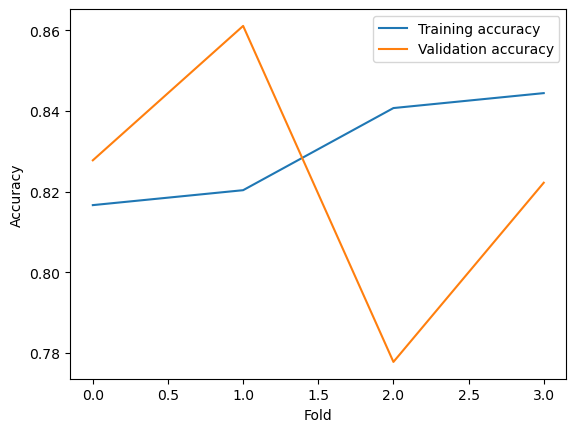

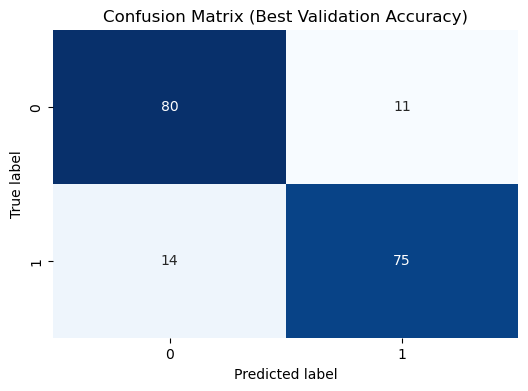

Classification report:
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        91
         1.0       0.82      0.82      0.82        89

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180



In [ ]:
# svm with polynomial kernel
evaluate_model(X_train_scaled, y_trainn, model = SVC(kernel='poly', degree=3))

The above graph shows that training accuracy and validation accuracy are very close.
The average accuracy for training and validation is about 82%. This tells us that the polynomial kernel is well fit but not as good as rbf.

## SVM with Sigmoid kernel

Fold 1
Fold 2
Fold 3
Fold 4
train_acc: [0.7777777777777778, 0.7611111111111111, 0.7870370370370371, 0.7592592592592593]
val_acc: [0.75, 0.7833333333333333, 0.75, 0.7888888888888889]
Mean train_acc: 77.13%
Mean val_acc: 76.81%


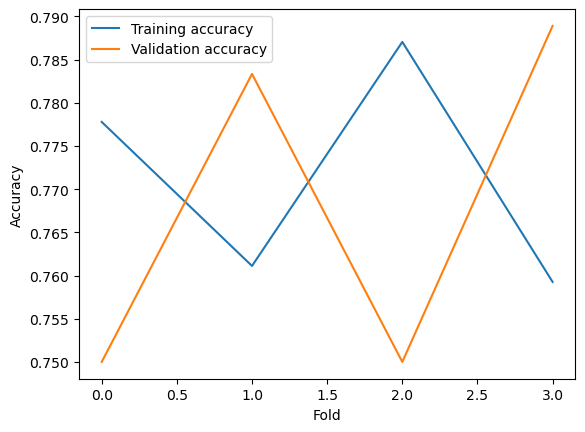

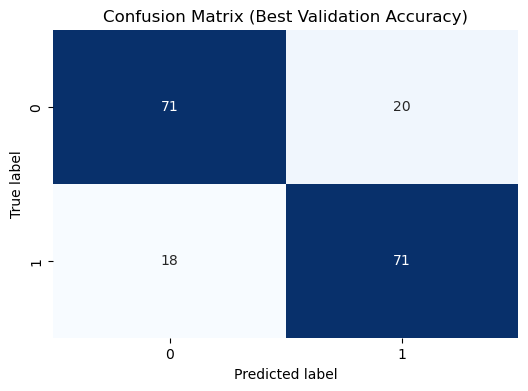

Classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79        91
         1.0       0.78      0.80      0.79        89

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180



In [ ]:
#svm with sigmoid kernel
evaluate_model(X_train_scaled, y_trainn, model = SVC(kernel='sigmoid'))

The above graph shows that training accuracy and validation accuracy are very close.
The best accuracy for training and validation is about 77% after performing 5 fold cross validation. This tells us that the sigmoid kernel is not the best fit as compared to the other kernels.

# Random Forest Classifier

Fold 1
Fold 2
Fold 3
Fold 4
train_acc: [0.9277777777777778, 0.9203703703703704, 0.9222222222222223, 0.9296296296296296]
val_acc: [0.8666666666666667, 0.8666666666666667, 0.8111111111111111, 0.9]
Mean train_acc: 92.50%
Mean val_acc: 86.11%


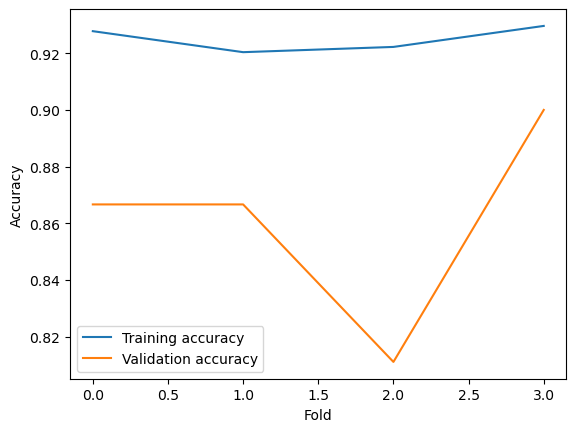

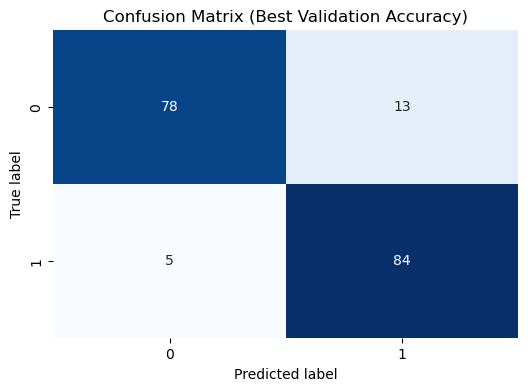

Classification report:
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90        91
         1.0       0.87      0.94      0.90        89

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180



In [ ]:
#random forest
evaluate_model(X_train_scaled, y_trainn, model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))

The above graph shows that training accuracy and validation accuracy is increasing at 92% and 86% respectively. This tells us that the random forest classifier model is well fit. It does not seem to be overfitting. The data is very small to be trained on and hence we see these graphs.

## Hyperparameter tuning for Random Forest

In [ ]:
def variation_wtih_esti(X_trainn, y_trainn, model):

    estimators = [50,100,150,200,250,300,350,400,450,500,550,650]
    MCV_list = []


    for e in estimators:
        # Initialize RBF Kernel SVM classifier
        current_rf =  RandomForestClassifier(n_estimators= e, max_depth=5, random_state=42)
        #current_svm = model
        kf = KFold(n_splits=3, random_state=1, shuffle=True)
        # Cross validation 3-Fold scores
        mean_crossval = np.mean(cross_val_score(current_rf, X_trainn, y_trainn, cv=kf))
        MCV_list.append(mean_crossval)
        #print("On C=", C, "\tMCV=", mean_crossval)


    plt.plot(estimators, MCV_list, color= 'teal')
    plt.title("Mean Cross Validation accuracy across estimators" ,fontsize=15, fontweight="bold")
    plt.xlabel('Estimator value', fontsize = 15)
    plt.xscale("log")
    plt.ylabel('Mean Cross Validation', fontsize = 15)
    plt.show()

    print("Highest val_accuracy : ", max(MCV_list))
    print("The optimum estimator_value being: ",estimators[MCV_list.index(max(MCV_list))] )

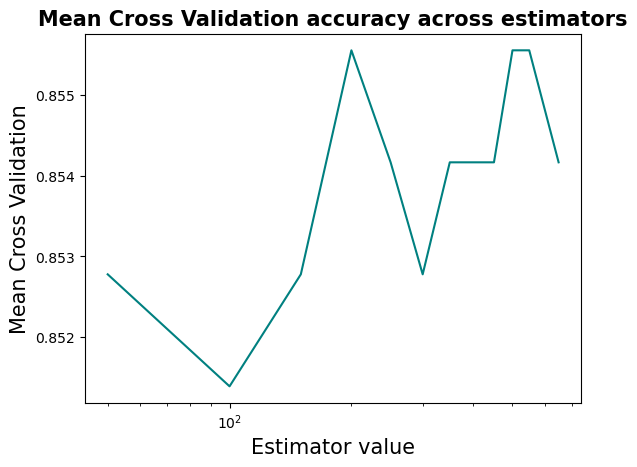

Highest val_accuracy :  0.8555555555555556
The optimum estimator_value being:  200


In [ ]:
variation_wtih_esti(X_train_scaled, y_trainn, model = "rf")

The validation accuracy has come out to be lower than before. Hence, let's try another approach to hyperparameter tuning.

Trying to find the best values of gamma and and C below and creating a 3D visualization.

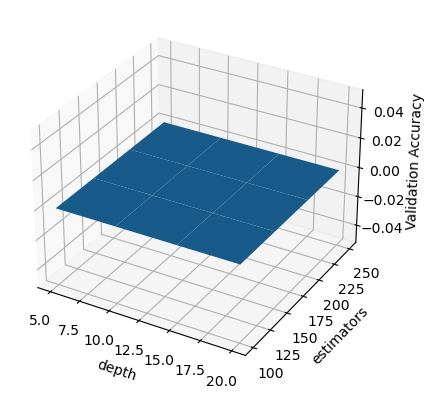

Best combination of depth and esti: (5, 100)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


X = X_train_scaled
y = y_trainn

# Define a range of gamma and C values
depth_range = [i for i in range(5, 21, 5)]
esti_range = [100,150,200,250]

# Create a grid of gamma and C values
depth_grid, esti_grid = np.meshgrid(depth_range, esti_range)

# Calculate the validation accuracy for each combination of gamma and C
scores = np.zeros_like(depth_grid)
for i in range(len(depth_range)):
    for j in range(len(esti_range)):
        clf = RandomForestClassifier(n_estimators= esti_range[j], max_depth=depth_range[i], random_state=42)
        scores[j, i] = np.mean(cross_val_score(clf, X, y, cv=4))

# Create a 3D plot of the validation accuracy surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(depth_grid, esti_grid, scores)
ax.set_xlabel('depth')
ax.set_ylabel('estimators')
ax.set_zlabel('Validation Accuracy')
plt.show()

# Get the combination of gamma and C values for which the validation accuracy was the highest
max_indices = np.unravel_index(np.argmax(scores), scores.shape)
best_depth = depth_range[max_indices[1]]
best_esti = esti_range[max_indices[0]]
print("Best combination of depth and esti:", (best_depth, best_esti))

## Grid search for random forest to find best parameters

In [ ]:
# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameters to search
param_grid = {'n_estimators': [10, 50, 100,150,200,250,300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'max_features': ['sqrt', 'log2']}

# Perform grid search with 4-fold cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=4)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_trainn)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)
print("Best validation accuracy:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best validation accuracy: 0.8638888888888889


              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88       116
         1.0       0.82      0.94      0.87       100

    accuracy                           0.88       216
   macro avg       0.88      0.88      0.87       216
weighted avg       0.88      0.88      0.88       216

0.875


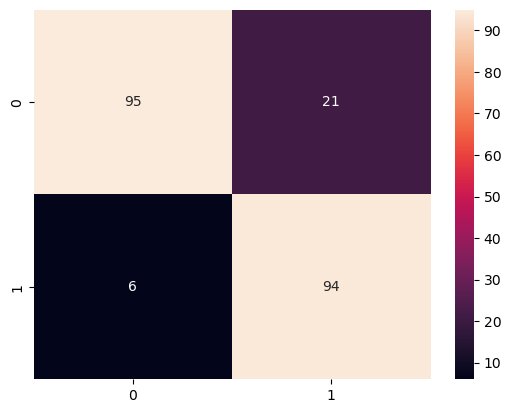

In [ ]:
run_the_best_model(X_train_scaled, y_trainn, model=RandomForestClassifier(max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100))

We can see the validation accuracy with the best parameters has come out to be 87.5% which was previously 86.38%. This model has overall performed better.

## Testing for random forest

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87        86
         1.0       0.87      0.88      0.88        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180

0.8722222222222222


0.8722222222222222

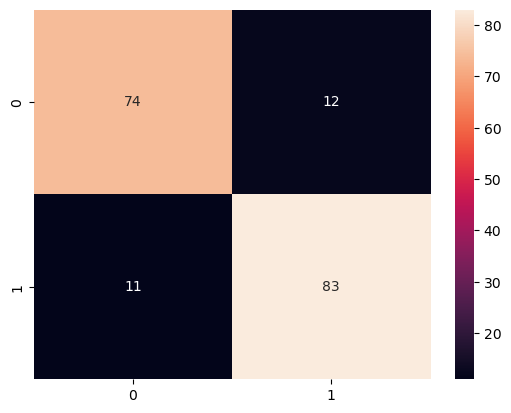

In [ ]:
run_the_best_model(X_train_scaled, y_trainn, X_test_scaled, y_testt, model=RandomForestClassifier(max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100))


In [ ]:
clf = clf1 = RandomForestClassifier(max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100)
clf.fit(X_train_scaled, y_trainn)
importances = clf.feature_importances_

In [ ]:
feature_names = df.columns.tolist()

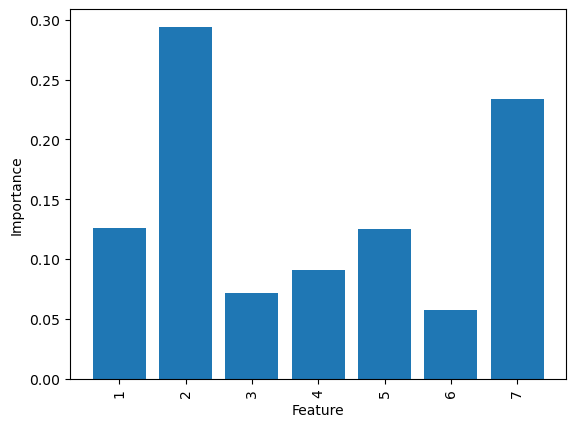

In [ ]:
plt.bar(range(X_train_scaled.shape[1]), importances)
plt.xticks(range(X_train_scaled.shape[1]), range(1, X_train_scaled.shape[1]+1), rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

The feature number 2 and 7 are MajorAxisLength and Perimeter are the highest and have the most importance. This will be useful in the overall process of classifying raisins.

In [ ]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


## Ensemble modeling with best parameters of all three models

In [ ]:
def ensemble_accuracy(X_train_scaled, y_train):

    clf1 = RandomForestClassifier(max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100)
    clf2 = LogisticRegression(C =3.90, max_iter =500, penalty = 'l2', solver= 'lbfgs')
    clf3 = SVC(kernel='rbf', C=10, degree=2, gamma=1)

    # Create the voting classifier
    ensemble_clf = VotingClassifier( estimators=[('dt', clf1), ('lr', clf2), ('svm', clf3)], voting='hard')

    # Load data and target variables
    X_new = X_train_scaled  # input features
    y_new = y_train  # target variable


    #aplitting the into training and validation set
    X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, test_size=0.3, random_state=42)
    ensemble_clf.fit(X_train, y_train)

     # Test the ensemble classifier
    acc = ensemble_clf.score(X_val, y_val)

    print(f"Best validation accuracy: {acc}")


In [ ]:
ensemble_accuracy(X_train_scaled, y_trainn)

Best validation accuracy: 0.8842592592592593


              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       116
         1.0       0.82      0.97      0.89       100

    accuracy                           0.88       216
   macro avg       0.89      0.89      0.88       216
weighted avg       0.90      0.88      0.88       216

0.8842592592592593


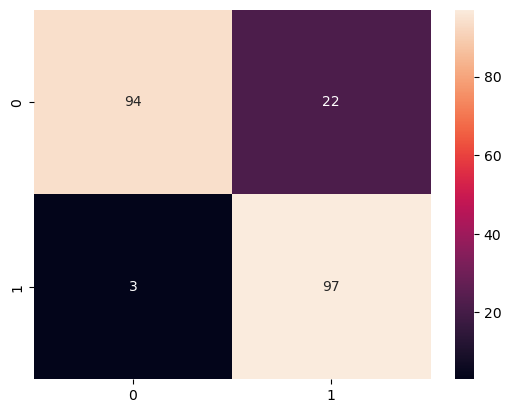

In [ ]:
run_the_best_model(X_train_scaled, y_trainn, model=VotingClassifier(estimators=[('dt', clf1), ('lr', clf2), ('svm', clf3)], voting='hard'))

The Ensemble of all three models have given a best accuracy of 88.42% which is higher than the validation accuracies of all three models even with the best parameters.

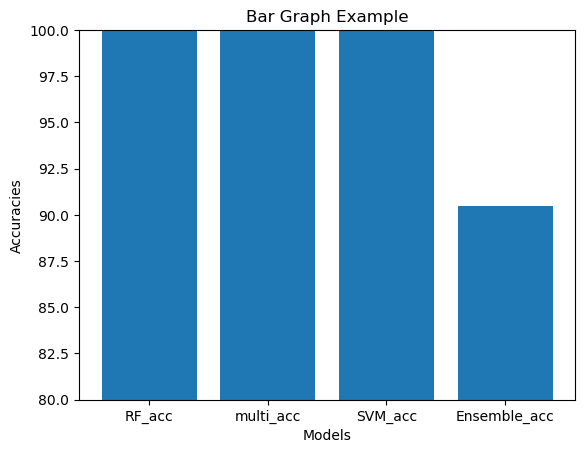

The accuracy of the ensemble data is the highest and outperforms the individual classifiers


In [ ]:
values = [(87.5)*100, (88.8)*100, (88.42)*100, 90.47]

labels = ['RF_acc', 'multi_acc', 'SVM_acc', 'Ensemble_acc']

# Create a bar plot

plt.bar(labels, values)


# Set the title and axis labels

plt.title('Bar Graph Example')

plt.xlabel('Models')

plt.ylabel('Accuracies')

plt.ylim(80, 100)

# Show the plot

plt.show()

print("The accuracy of the ensemble data is the highest and outperforms the individual classifiers")

# Testing on the test set

In [ ]:
ensemble_accuracy(X_test_scaled, y_testt)

Best validation accuracy: 0.8703703703703703


The testing accuracy is 87.03% which is quiet close to the validation accuracy.

References :
Github : https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb
Textbook : Hands on machine learning with scikit-learn and tensorflow